In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.fft import fft, ifft, fftfreq
import scipy.signal as signal


![Texto alternativo](CTSPDalgoritmo.jpg)


In [570]:
df = pd.read_csv("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Descarga Datos K\\Hourly Energy Consumption\\archiv\\AEP_hourly.csv")


df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.sort_values(by='Datetime',inplace = True)
df.reset_index(drop=True, inplace=True)

In [571]:
datos = df[:8760]
datos = df[:500]

# ALGORITMO

## 1. the data owner calculates the auto - correlation function $R_{XX}(\tau)$ of the time series X to be released. 

In [572]:
# función de autocorrelación de los datos: 
Rxx = sm.tsa.acf(datos['AEP_MW'], nlags=(len(datos['AEP_MW'])-1))



## 2. the data owner generates four IID Gauss white nouse series with the same lenght as X. their distribution satisfies $ G_{i} - N(0, \sqrt{2 \lambda} )...  \lambda =  \frac{ \Delta f} {\epsilon}, i \in {1,2,3,4} $


In [573]:

# 2. # Generar 4 ruido blanco gaussiano

epsilon = 0.1
#loc = media, scale = desviacion

deltaF = 1

# Calcula lambda
l = deltaF / epsilon

# Calcula la desviación estándar del ruido blanco
desv = np.sqrt(2 * l)


# Genera las cuatro series de ruido blanco

# G1 = np.random.normal(loc=0, scale=desv, size=len(datos))
# G2 = np.random.normal(loc=0, scale=desv, size=len(datos))
# G3 = np.random.normal(loc=0, scale=desv, size=len(datos))
# G4 = np.random.normal(loc=0, scale=desv, size=len(datos))
    
    
G1 = np.random.normal(loc=0, scale=1, size=len(datos))
G2 = np.random.normal(loc=0, scale=1, size=len(datos))
G3 = np.random.normal(loc=0, scale=1, size=len(datos))
G4 = np.random.normal(loc=0, scale=1, size=len(datos))

## 3.  let $ G_1, G_2, G_3, G_4$ pass through a specific filter whose impulse response $ h(\tau) is  \sqrt{\frac{R_{xx}(\tau)}{16 \pi N_0}} $ and obtain four new gauss noise series  $ G´_1, G´_2, G´_3, G´_4$ with the autocorrelation funcion $ R_{G´}(\tau) = \sqrt{\frac{R_{xx}(\tau)}{8}} $


In [574]:


def psd(Rxx, dt):
    n = len(Rxx)
    psd = np.abs(fft(np.sqrt(Rxx/8+0j), 2*n))**2
    freq = fftfreq(2*n, dt)
    psd = psd[:n]
    freq = freq[:n]
    return psd, freq

In [575]:
# PSD de la función x
PSD_RXX1,frecuencias_RXX1 = psd(Rxx,1)
N_01 = np.var(G1) 



# PSD de la función x
PSD_RXX2,frecuencias_RXX2 = psd(Rxx,1)
N_02 = np.var(G2) 

# PSD de la función x
PSD_RXX3,frecuencias_RXX3 = psd(Rxx,1)
N_03 = np.var(G3) 


# PSD de la función x
PSD_RXX4,frecuencias_RXX4 = psd(Rxx,1)
N_04 = np.var(G4) 


In [576]:
H_W1 = PSD_RXX1/N_01

H_W2 = PSD_RXX2/N_02

H_W3 = PSD_RXX3/N_03

H_W4 = PSD_RXX4/N_04


In [577]:
G1_DFT = fft(G1)

G2_DFT = fft(G2)

G3_DFT = fft(G3)

G4_DFT = fft(G4)


In [578]:
Filtro1 = G1_DFT * H_W1

Filtro2 = G2_DFT * H_W2

Filtro3 = G3_DFT * H_W3

Filtro4 = G4_DFT * H_W4

In [579]:
G1_prima = ifft(Filtro1).real

G2_prima = ifft(Filtro2).real

G3_prima = ifft(Filtro3).real

G4_prima = ifft(Filtro4).real

In [580]:
suma = np.add(np.power(G1_prima,2),np.power(G2_prima,2))

resta = np.subtract(suma,np.power(G3_prima,2))

Z = np.subtract(resta,np.power(G4_prima,2))



In [581]:

#G1_prima = signal.convolve(G1, h_tau, mode='same')
RZ = sm.tsa.acf(Z, nlags=(len(Z)-1))

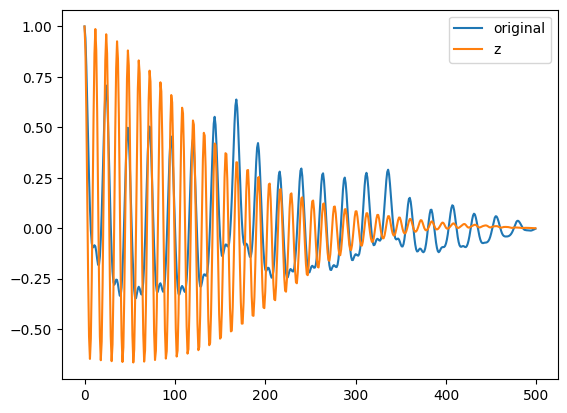

In [582]:
plt.plot(Rxx,label = "original")
plt.plot(RZ,label = "z")
plt.legend()


In [583]:
def CTSDP(datos):
    # función de autocorrelación de los datos: 
    Rxx = sm.tsa.acf(datos['AEP_MW'], nlags=(len(datos['AEP_MW'])-1))

        
    # Calcular ruido blanco    
    G1 = np.random.normal(loc=0, scale=1, size=len(datos))
    G2 = np.random.normal(loc=0, scale=1, size=len(datos))
    G3 = np.random.normal(loc=0, scale=1, size=len(datos))
    G4 = np.random.normal(loc=0, scale=1, size=len(datos))
        

    # PSD de la función x
    PSD_RXX1,frecuencias_RXX1 = psd(Rxx,1)
    N_01 = np.var(G1) 



    # PSD de la función x
    PSD_RXX2,frecuencias_RXX2 = psd(Rxx,1)
    N_02 = np.var(G2) 


    # PSD de la función x
    PSD_RXX3,frecuencias_RXX3 = psd(Rxx,1)
    N_03 = np.var(G3) 



    # PSD de la función x
    PSD_RXX4,frecuencias_RXX4 = psd(Rxx,1)
    N_04 = np.var(G4) 



    H_W1 = PSD_RXX1/N_01

    H_W2 = PSD_RXX2/N_02

    H_W3 = PSD_RXX3/N_03

    H_W4 = PSD_RXX4/N_04

    # Pasar ruido Blanco a dominio de frecuencias
    G1_DFT = fft(G1)

    G2_DFT = fft(G2)

    G3_DFT = fft(G3)

    G4_DFT = fft(G4)

    # encontrar autocorrelación del ruido
    Filtro1 = G1_DFT * H_W1

    Filtro2 = G2_DFT * H_W2

    Filtro3 = G3_DFT * H_W3
    Filtro4 = G4_DFT * H_W4

    # devolver a dominio del tiempo
    
    G1_prima = ifft(Filtro1).real

    G2_prima = ifft(Filtro2).real

    G3_prima = ifft(Filtro3).real

    G4_prima = ifft(Filtro4).real

    # encontrar Z 
    suma = np.add(np.power(G1_prima,2),np.power(G2_prima,2))

    resta = np.subtract(suma,np.power(G3_prima,2))

    Z = np.subtract(resta,np.power(G4_prima,2))

    #G1_prima = signal.convolve(G1, h_tau, mode='same')
    RZ = sm.tsa.acf(Z, nlags=(len(Z)-1))



    return RZ

In [584]:
N_02

1

In [585]:
N_01

1

In [586]:
N_03

1

In [587]:
RZ /= np.max(RZ)

## 4. Calculate Z =  $ G´_1^{2}+ G´_2^{2}- G´_3^{2}- G´_4$


## 5 add noise series Z into X and obtain the time series X' = X+Z



## Return X' 